In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (343).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (88).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (135).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (297).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (185).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (123).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (295).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (119).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (101).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (71).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (323).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (126).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (196).jpeg
/kaggl

In [2]:
import pathlib

# Assuming data_dir is the path to the directory containing subdirectories for each plant class
data_dir = pathlib.Path("/kaggle/input/herb300/train")

# Use glob to get a list of all subdirectories representing plant classes in data_dir
plant_classes = [subdir.name for subdir in data_dir.glob('*') if subdir.is_dir()]

# Initialize an empty dictionary
leaf_images_dict = {}

# Loop through each plant class and populate the dictionary
for plant_class in plant_classes:
    # Use the plant class name as the key and create a list of file paths using glob
    leaf_images_dict[plant_class] = list((data_dir / plant_class).glob('*'))

# Print the number of classes
print(f"Number of classes: {len(plant_classes)}")

# Print the number of images per class
for plant_class, file_paths in leaf_images_dict.items():
    print(f"{plant_class}: {len(file_paths)} images")

Number of classes: 43
Pongamia_pinnata a: 301 images
Alkanet_Root: 301 images
Eclipta_Alba: 301 images
Excoecaria cochinchinensiss: 301 images
Solanum: 301 images
Lonicera_caprifol: 301 images
Prunella_vulgaris: 301 images
Beefsteakk: 301 images
Gotukola: 299 images
Myrica esculentaa: 301 images
leonarus: 301 images
Kamarkas: 301 images
Alpinia_Galangaa: 297 images
Holarrhena antidysenterica: 301 images
Andrographis paniculata: 301 images
Chinese_Yumm: 301 images
Lochnera_rosea: 301 images
Lysimachia: 301 images
Ramiee: 301 images
Phyllanthuss: 301 images
Abelmoschus_sagittifolius: 300 images
Achyranthes_asperaa: 300 images
Indian Bay Leaf: 301 images
Gingerr: 301 images
Abutilon_indicumm: 300 images
Bearde_ iriss: 301 images
Clerodendrum_serratumm: 301 images
Oleander: 301 images
Tulsii: 301 images
Goumi_berries: 301 images
Oriental: 301 images
Artemisia_Argyii: 301 images
Kumis: 301 images
Schefflera heptaphylla: 301 images
Rhodomyrtus: 301 images
Basella_Albaa: 301 images
Euphorbia:

In [3]:
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers
import PIL
import pathlib
from tensorflow.keras.models import Sequential
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# with a image size of 128,128

In [5]:
def load_data_and_labels(directory_path):
    x, y = [], []

    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

    for class_index, subdir in enumerate(subdirectories):
        class_path = os.path.join(directory_path, subdir)

        for file_name in os.listdir(class_path):
            image_path = os.path.join(class_path, file_name)
            try:
                img = cv2.imread(image_path)
                if img is not None:
                    # Resize image to (128, 128)
                    resized_img = cv2.resize(img, (128, 128))
                    x.append(resized_img)
                    y.append(class_index)
                else:
                    print(f"Error: Unable to read the image {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {str(e)}")

    return np.array(x), np.array(y)

herbdata_path = '/kaggle/input/herb300/train'
x, y = load_data_and_labels(herbdata_path)

# Split the dataset into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define ImageDataGenerator instances without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 64
num_classes = len(np.unique(y))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

train_generator = train_datagen.flow(x_train, y_train_one_hot, batch_size=batch_size, shuffle=True)
val_generator = val_datagen.flow(x_val, y_val_one_hot, batch_size=batch_size, shuffle=False)
test_generator = test_datagen.flow(x_test, y_test_one_hot, batch_size=batch_size, shuffle=False)

Error: Unable to read the image /kaggle/input/herb300/train/Pongamia_pinnata a/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Alkanet_Root/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Eclipta_Alba/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Excoecaria cochinchinensiss/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Solanum/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Lonicera_caprifol/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Prunella_vulgaris/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Beefsteakk/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Gotukola/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Myrica esculentaa/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/leonarus/desktop.ini
Error: Unable to read the image /kaggle/inpu

libpng warning: iTXt: CRC error
libpng warning: iTXt: CRC error


Error: Unable to read the image /kaggle/input/herb300/train/Indian Bay Leaf/desktop.ini


libpng warning: iTXt: CRC error
Corrupt JPEG data: 5 extraneous bytes before marker 0xee


Error: Unable to read the image /kaggle/input/herb300/train/Gingerr/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Bearde_ iriss/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Clerodendrum_serratumm/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Oleander/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Tulsii/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Goumi_berries/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Oriental/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Artemisia_Argyii/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Kumis/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Schefflera heptaphylla/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Rhodomyrtus/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Basell

In [6]:
print("Number of successfully read images:", len(x))
print("Number of corresponding labels:", len(y))

Number of successfully read images: 12888
Number of corresponding labels: 12888


In [7]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print(y_val_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [9]:
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(train_generator)
print(val_generator)
print(test_generator)

In [11]:
print("First 5 elements of y:", y[:5])

First 5 elements of y: [0 0 0 0 0]


In [12]:
x[0]

array([[[ 31, 194, 126],
        [ 29, 201, 133],
        [ 12, 193, 124],
        ...,
        [ 49, 116,  66],
        [ 50, 121,  69],
        [ 50, 124,  72]],

       [[  7, 161,  94],
        [ 20, 187, 120],
        [ 15, 193, 125],
        ...,
        [ 49, 116,  66],
        [ 53, 120,  69],
        [ 53, 123,  72]],

       [[  3, 147,  80],
        [ 24, 184, 118],
        [ 22, 194, 127],
        ...,
        [ 49, 116,  66],
        [ 54, 120,  69],
        [ 56, 123,  72]],

       ...,

       [[  7,  68,  26],
        [  5,  66,  24],
        [  7,  69,  27],
        ...,
        [ 18,  68,  72],
        [ 17,  67,  76],
        [ 23,  72,  84]],

       [[  6,  69,  27],
        [  9,  72,  30],
        [ 11,  74,  32],
        ...,
        [ 34,  80,  83],
        [ 28,  73,  82],
        [ 15,  60,  71]],

       [[  6,  69,  27],
        [ 19,  82,  40],
        [ 18,  81,  39],
        ...,
        [ 12,  54,  57],
        [ 19,  59,  67],
        [ 25,  65,  76]]

In [13]:
# Print the shapes of the resulting sets
print("Train set shapes:", x_train.shape, y_train.shape)
print("Validation set shapes:", x_val.shape, y_val.shape)
print("Test set shapes:", x_test.shape, y_test.shape)

Train set shapes: (9021, 128, 128, 3) (9021,)
Validation set shapes: (1933, 128, 128, 3) (1933,)
Test set shapes: (1934, 128, 128, 3) (1934,)


In [14]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from keras.layers import GlobalAveragePooling2D

# with 20 epoch

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Define image shape and number of classes
img_shape = (128, 128, 3)
num_classes = 52

# Uncomment here 
Name = "VGG19"
classifier = VGG19(
    include_top=False,
    input_shape=img_shape,
    weights='imagenet'
)

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False


# Model
model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

80134624/80134624 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (Batch  (None, 8192)              32768     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                         

# MODEL-NO - 5

In [16]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler  # Remove the extra character here

def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 20:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy']
)

# Model Training
callbacks = [checkpoint, early_stopping, lr_scheduler]

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)


Epoch 1/20
141/141 [==============================] - ETA: 0s - loss: 2.4149 - accuracy: 0.4424 - categorical_accuracy: 0.4424
Epoch 1: val_accuracy improved from -inf to 0.65132, saving model to best_model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


141/141 [==============================] - 18s 85ms/step - loss: 2.4149 - accuracy: 0.4424 - categorical_accuracy: 0.4424 - val_loss: 1.7070 - val_accuracy: 0.6513 - val_categorical_accuracy: 0.6513 - lr: 0.0010
Epoch 2/20
141/141 [==============================] - ETA: 0s - loss: 1.2531 - accuracy: 0.7427 - categorical_accuracy: 0.7427
Epoch 2: val_accuracy improved from 0.65132 to 0.78531, saving model to best_model.h5
141/141 [==============================] - 10s 70ms/step - loss: 1.2531 - accuracy: 0.7427 - categorical_accuracy: 0.7427 - val_loss: 1.2870 - val_accuracy: 0.7853 - val_categorical_accuracy: 0.7853 - lr: 0.0010
Epoch 3/20
141/141 [==============================] - ETA: 0s - loss: 0.9411 - accuracy: 0.8311 - categorical_accuracy: 0.8311
Epoch 3: val_accuracy improved from 0.78531 to 0.82980, saving model to best_model.h5
141/141 [==============================] - 10s 70ms/step - loss: 0.9411 - accuracy: 0.8311 - categorical_accuracy: 0.8311 - val_loss: 1.1658 - val_acc

In [17]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

31/31 [==============================] - 2s 67ms/step - loss: 0.4948 - accuracy: 0.9312 - categorical_accuracy: 0.9312
Test Loss: 0.4947546124458313
Test Accuracy: 0.9312306046485901


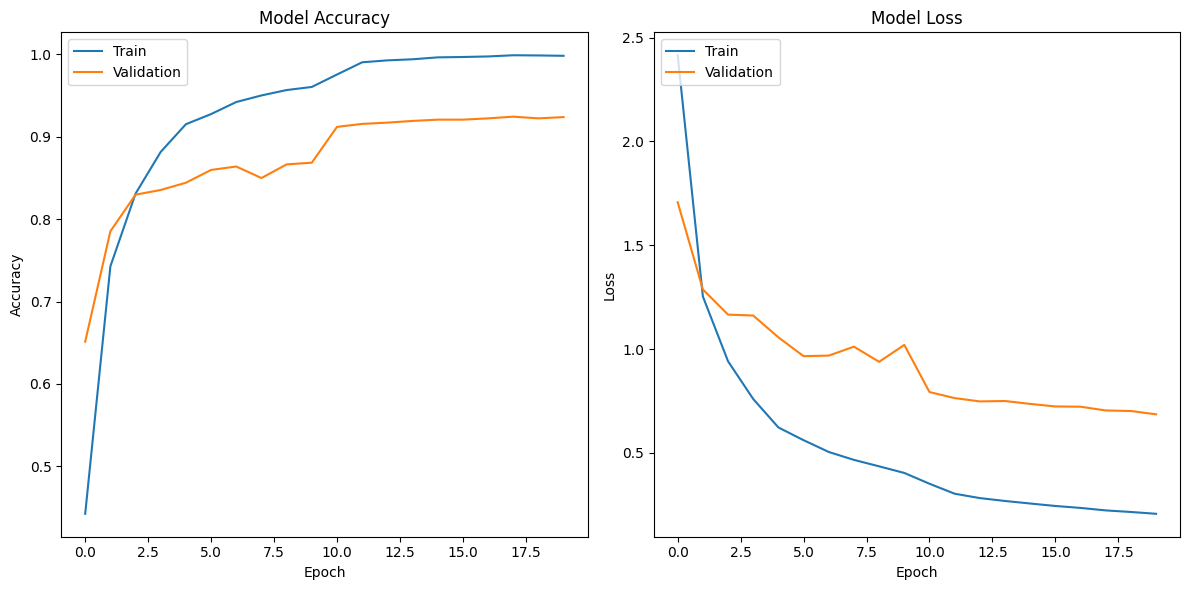

In [18]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

# with 15 epochs

# MODEL NO - 6

In [19]:
# Callbacks
checkpoint = ModelCheckpoint( filepath='best_Resnet.h6', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler  # Remove the extra character here

def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 20:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy']
)

# Model Training
callbacks = [checkpoint, early_stopping, lr_scheduler]

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)


Epoch 1/15
141/141 [==============================] - ETA: 0s - loss: 0.3627 - accuracy: 0.9456 - categorical_accuracy: 0.9456
Epoch 1: val_accuracy improved from -inf to 0.84946, saving model to best_Resnet.h6
141/141 [==============================] - 16s 94ms/step - loss: 0.3627 - accuracy: 0.9456 - categorical_accuracy: 0.9456 - val_loss: 1.0266 - val_accuracy: 0.8495 - val_categorical_accuracy: 0.8495 - lr: 0.0010
Epoch 2/15
141/141 [==============================] - ETA: 0s - loss: 0.4017 - accuracy: 0.9445 - categorical_accuracy: 0.9445
Epoch 2: val_accuracy improved from 0.84946 to 0.85101, saving model to best_Resnet.h6
141/141 [==============================] - 12s 88ms/step - loss: 0.4017 - accuracy: 0.9445 - categorical_accuracy: 0.9445 - val_loss: 1.0469 - val_accuracy: 0.8510 - val_categorical_accuracy: 0.8510 - lr: 0.0010
Epoch 3/15
141/141 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.9528 - categorical_accuracy: 0.9528
Epoch 3: val_accuracy im

In [20]:
import pickle

# Assuming history is the history object obtained during model training
with open('best_Resnet.h6_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

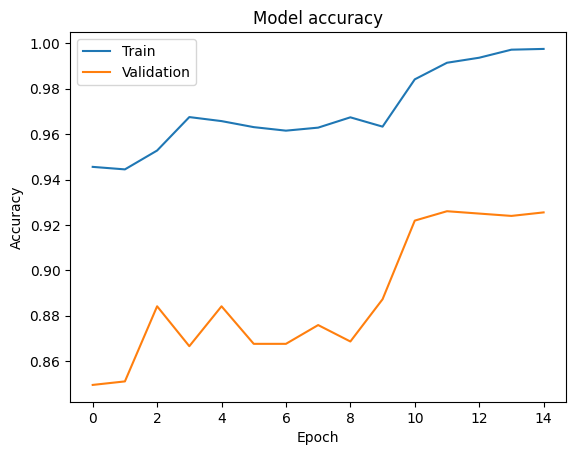

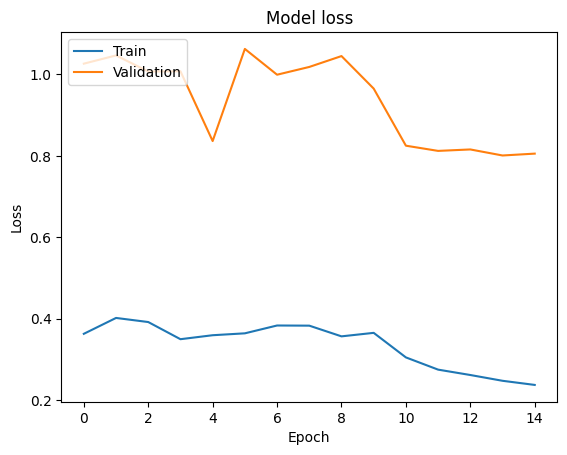

In [21]:
import pickle

# Load the training history
with open('best_Resnet.h6_history.pkl', 'rb') as file:
    history = pickle.load(file)
    
import matplotlib.pyplot as plt

# Load the training history
with open('best_Resnet.h6_history.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# WITH 25 EPOCH

# MODEL NO -7

In [22]:
# Define image shape and number of classes
img_shape = (128, 128, 3)
num_classes = 43

# Uncomment here 
Name = "VGG19"
classifier = VGG19(
    include_top=False,
    input_shape=img_shape,
    weights='imagenet'
)

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
#for layer in classifier.layers:
    layer.trainable = False


# Model
model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_2 (Bat  (None, 8192)              32768     
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [23]:
# Callbacks
checkpoint = ModelCheckpoint(filepath='best_Resnet.h7', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler  # Remove the extra character here

def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 20:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy']
)

# Model Training
callbacks = [checkpoint, early_stopping, lr_scheduler]

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)


Epoch 1/25
141/141 [==============================] - ETA: 0s - loss: 2.4748 - accuracy: 0.4324 - categorical_accuracy: 0.4324
Epoch 1: val_accuracy improved from -inf to 0.60372, saving model to best_Resnet.h7
141/141 [==============================] - 16s 94ms/step - loss: 2.4748 - accuracy: 0.4324 - categorical_accuracy: 0.4324 - val_loss: 1.9843 - val_accuracy: 0.6037 - val_categorical_accuracy: 0.6037 - lr: 0.0010
Epoch 2/25
141/141 [==============================] - ETA: 0s - loss: 1.2780 - accuracy: 0.7372 - categorical_accuracy: 0.7372
Epoch 2: val_accuracy improved from 0.60372 to 0.75892, saving model to best_Resnet.h7
141/141 [==============================] - 13s 90ms/step - loss: 1.2780 - accuracy: 0.7372 - categorical_accuracy: 0.7372 - val_loss: 1.4258 - val_accuracy: 0.7589 - val_categorical_accuracy: 0.7589 - lr: 0.0010
Epoch 3/25
141/141 [==============================] - ETA: 0s - loss: 0.9247 - accuracy: 0.8349 - categorical_accuracy: 0.8349
Epoch 3: val_accuracy im

In [24]:
import pickle

# Assuming history is the history object obtained during model training
with open('best_Resnet.h7_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

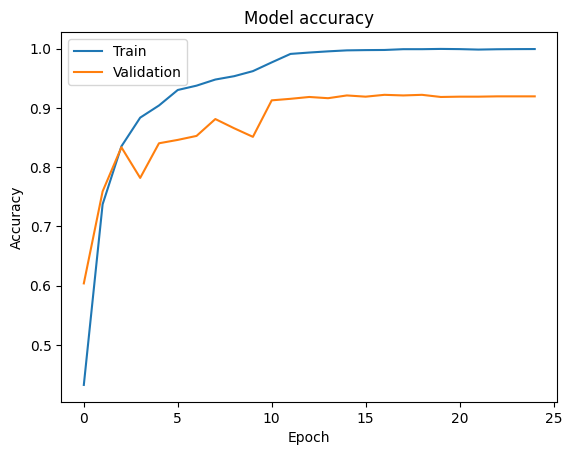

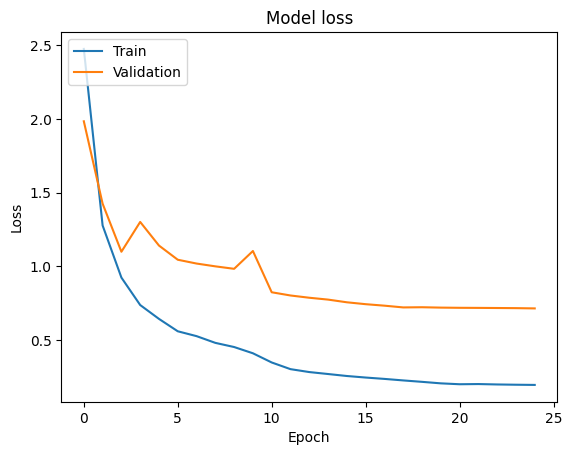

In [25]:
import pickle

# Load the training history
with open('best_Resnet.h7_history.pkl', 'rb') as file:
    history = pickle.load(file)
    
import matplotlib.pyplot as plt

# Load the training history
with open('best_Resnet.h7_history.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# input size of image is 64,64

In [26]:
def load_data_and_labels(directory_path):
    x, y = [], []

    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

    for class_index, subdir in enumerate(subdirectories):
        class_path = os.path.join(directory_path, subdir)

        for file_name in os.listdir(class_path):
            image_path = os.path.join(class_path, file_name)
            try:
                img = cv2.imread(image_path)
                if img is not None:
                    # Resize image to (128, 128)
                    resized_img = cv2.resize(img, (64, 64))
                    x.append(resized_img)
                    y.append(class_index)
                else:
                    print(f"Error: Unable to read the image {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {str(e)}")

    return np.array(x), np.array(y)

herbdata_path = '/kaggle/input/herb300/train'
x, y = load_data_and_labels(herbdata_path)

# Split the dataset into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define ImageDataGenerator instances without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 64
num_classes = len(np.unique(y))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

train_generator = train_datagen.flow(x_train, y_train_one_hot, batch_size=batch_size, shuffle=True)
val_generator = val_datagen.flow(x_val, y_val_one_hot, batch_size=batch_size, shuffle=False)
test_generator = test_datagen.flow(x_test, y_test_one_hot, batch_size=batch_size, shuffle=False)

Error: Unable to read the image /kaggle/input/herb300/train/Pongamia_pinnata a/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Alkanet_Root/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Eclipta_Alba/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Excoecaria cochinchinensiss/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Solanum/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Lonicera_caprifol/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Prunella_vulgaris/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Beefsteakk/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Gotukola/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Myrica esculentaa/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/leonarus/desktop.ini
Error: Unable to read the image /kaggle/inpu

libpng warning: iTXt: CRC error
libpng warning: iTXt: CRC error


Error: Unable to read the image /kaggle/input/herb300/train/Indian Bay Leaf/desktop.ini


libpng warning: iTXt: CRC error
Corrupt JPEG data: 5 extraneous bytes before marker 0xee


Error: Unable to read the image /kaggle/input/herb300/train/Gingerr/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Bearde_ iriss/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Clerodendrum_serratumm/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Oleander/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Tulsii/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Goumi_berries/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Oriental/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Artemisia_Argyii/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Kumis/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Schefflera heptaphylla/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Rhodomyrtus/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Basell

# MODEL NO 8

In [27]:
# Define image shape and number of classes
img_shape = (64, 64, 3)
num_classes = 43

# Uncomment here 
Name = "VGG19"
classifier = VGG19(
    include_top=False,
    input_shape=img_shape,
    weights='imagenet'
)

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
#for layer in classifier.layers:
    layer.trainable = False


# Model
model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [28]:
# Callbacks
checkpoint = ModelCheckpoint(filepath='best_Resnet.h8', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler  # Remove the extra character here

def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 20:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy']
)

# Model Training
callbacks = [checkpoint, early_stopping, lr_scheduler]

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/15
140/141 [============================>.] - ETA: 0s - loss: 2.7989 - accuracy: 0.3308 - categorical_accuracy: 0.3308
Epoch 1: val_accuracy improved from -inf to 0.49302, saving model to best_Resnet.h8
141/141 [==============================] - 10s 51ms/step - loss: 2.7935 - accuracy: 0.3320 - categorical_accuracy: 0.3320 - val_loss: 2.2242 - val_accuracy: 0.4930 - val_categorical_accuracy: 0.4930 - lr: 0.0010
Epoch 2/15
139/141 [============================>.] - ETA: 0s - loss: 1.8013 - accuracy: 0.5576 - categorical_accuracy: 0.5576
Epoch 2: val_accuracy improved from 0.49302 to 0.62597, saving model to best_Resnet.h8
141/141 [==============================] - 7s 47ms/step - loss: 1.8001 - accuracy: 0.5578 - categorical_accuracy: 0.5578 - val_loss: 1.7285 - val_accuracy: 0.6260 - val_categorical_accuracy: 0.6260 - lr: 0.0010
Epoch 3/15
139/141 [============================>.] - ETA: 0s - loss: 1.4343 - accuracy: 0.6549 - categorical_accuracy: 0.6549
Epoch 3: val_accuracy imp

In [29]:
import pickle

# Assuming history is the history object obtained during model training
with open('best_Resnet.h8_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

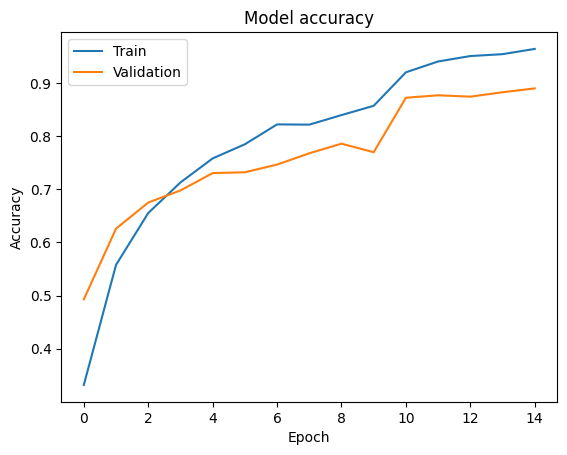

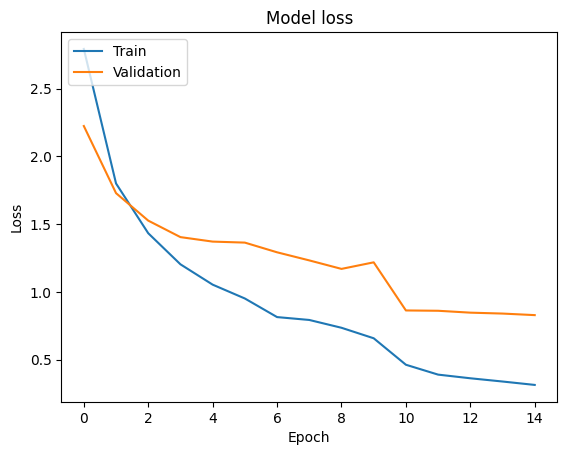

In [30]:
import pickle

# Load the training history
with open('best_Resnet.h8_history.pkl', 'rb') as file:
    history = pickle.load(file)
    
import matplotlib.pyplot as plt

# Load the training history
with open('best_Resnet.h8_history.pkl', 'rb') as file:
    history = pickle.load(file)

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# MODEL NO -9

In [31]:
# Callbacks
checkpoint = ModelCheckpoint(filepath='best_Resnet.h9', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler  # Remove the extra character here

def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 20:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy']
)

# Model Training
callbacks = [checkpoint, early_stopping, lr_scheduler]

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/20
139/141 [============================>.] - ETA: 0s - loss: 0.5490 - accuracy: 0.8760 - categorical_accuracy: 0.8760
Epoch 1: val_accuracy improved from -inf to 0.75375, saving model to best_Resnet.h9
141/141 [==============================] - 9s 46ms/step - loss: 0.5496 - accuracy: 0.8760 - categorical_accuracy: 0.8760 - val_loss: 1.3034 - val_accuracy: 0.7538 - val_categorical_accuracy: 0.7538 - lr: 0.0010
Epoch 2/20
139/141 [============================>.] - ETA: 0s - loss: 0.5287 - accuracy: 0.8798 - categorical_accuracy: 0.8798
Epoch 2: val_accuracy improved from 0.75375 to 0.82928, saving model to best_Resnet.h9
141/141 [==============================] - 7s 47ms/step - loss: 0.5289 - accuracy: 0.8796 - categorical_accuracy: 0.8796 - val_loss: 1.0493 - val_accuracy: 0.8293 - val_categorical_accuracy: 0.8293 - lr: 0.0010
Epoch 3/20
139/141 [============================>.] - ETA: 0s - loss: 0.4706 - accuracy: 0.8962 - categorical_accuracy: 0.8962
Epoch 3: val_accuracy did 